**Objective**

The objective of this notebook is to perform data preprocessing and Exploratory Data Analysis (EDA) for diabetes diagnosis.

## Importing the required libraries 

In [ ]:
import pandas as pd
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report

# filter warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
# This is so that entire datafraeme can be seen when printed
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)


## Import the data  

In [46]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv("./Resources/pima-indians-diabetes.csv", names= colnames )
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Insights 

### Display the first 5 rows of the dataset. 

In [47]:
df.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 768 rows and 9 columns.


### Datatypes of the different columns in the dataset

In [49]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

##### There are nine numeric columns in the dataset. I expect outcome to be category.

In [51]:
df.loc[df.plas == 0, 'plas'] = df.plas.median()
df.loc[df.pres == 0, 'pres'] = df.pres.median()
df.loc[df.skin == 0, 'skin'] = df.skin.median()
df.loc[df.test == 0, 'test'] = df.test.median()
df.loc[df.mass == 0, 'mass'] = df.mass.median()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [54]:
df.groupby("class").agg({'class': 'count'})

,class
class,
0,500
1,268


In [55]:
df_col_num = df.select_dtypes('number').columns.to_list()
df_col_num

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [56]:
df_col_cat = df.select_dtypes('object').columns.to_list()
df_col_cat

[]

### Statistical summary of the data

In [57]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


* `Tenure` : The average tenure of the customers is around 32 months and the range is from 0 to 72 months. The median tenure is 29 months. Since the mean is more than the median, data is positively skewed. 
* `Monthly_Charges` : The average monthly charge is 64.77. It varies between 18.25 and 118.75. The median value of the monthly charges is 70.35. Since the mean is less than median, data is negatively skewed.
* `Total_Charges` : The average total charge is 2282.94. The range is in between 18.80 and 8684.80. In comparison to the mean, the median(1397.10) is quite low. This indicates a right-skewed distribution of total charges.

## Data Preprocessing

### Checking for duplicate entries in the data

In [58]:
df.duplicated().sum()

0

In [63]:
print(df['class'].value_counts())
print(df['class'].value_counts(normalize=True)*100)

0    500
1    268
Name: class, dtype: int64
0    65.104167
1    34.895833
Name: class, dtype: float64


There are about 268 people who are diabetic and 500 non-diabetic people.

### Checking for missing values in the data.

In [ ]:
df.isnull().sum()

There are no missing values in the dataset.

##  Data Visualization

### Univariate Analysis

Creating helper functions data visualization

In [64]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [65]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [66]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [67]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [68]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

#### Univariate analysis of different integer and categorical variables. 

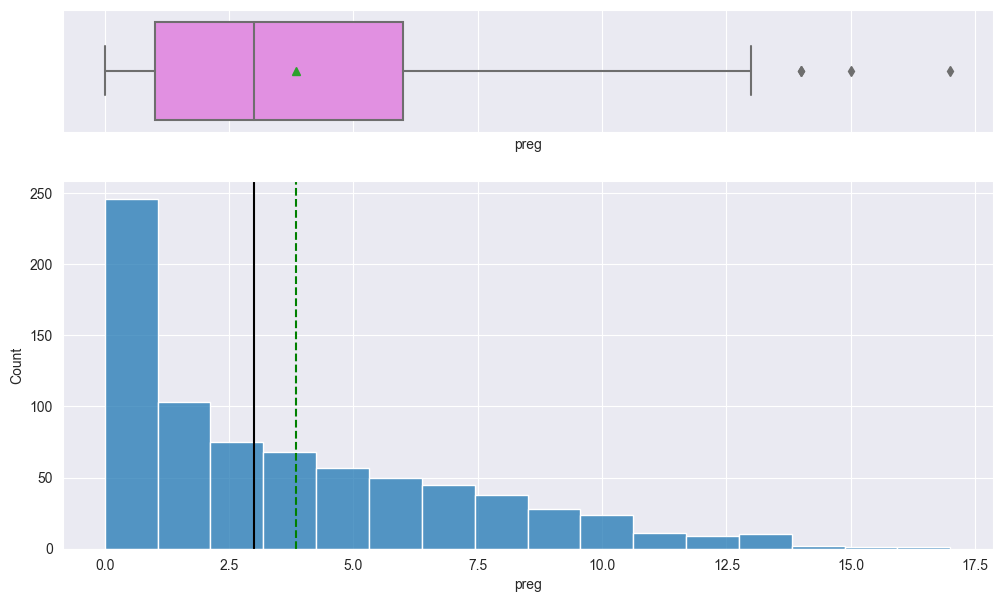

In [69]:
histogram_boxplot(data=df, feature= 'preg')

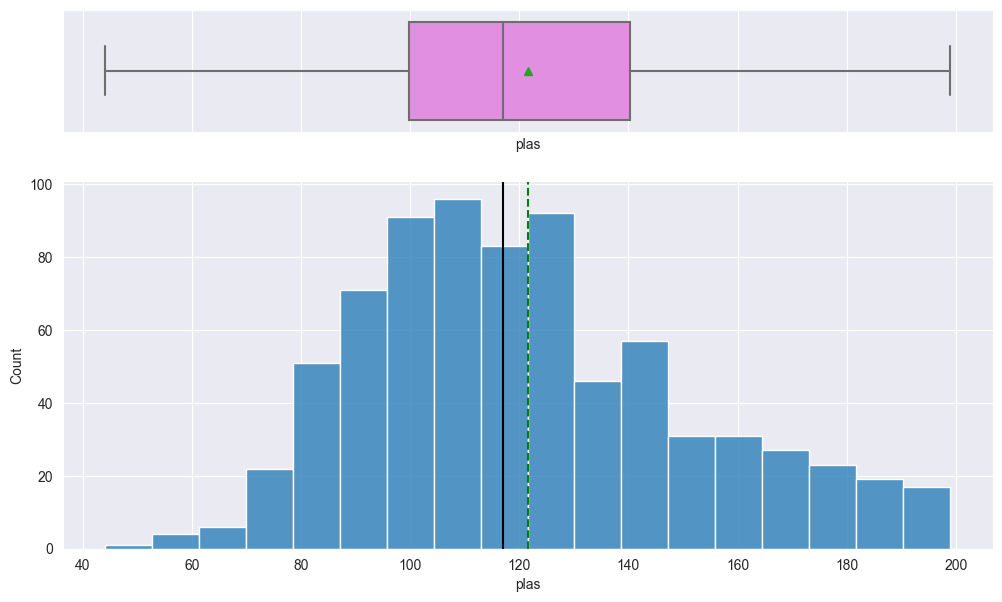

In [70]:
histogram_boxplot(data= df, feature= 'plas')

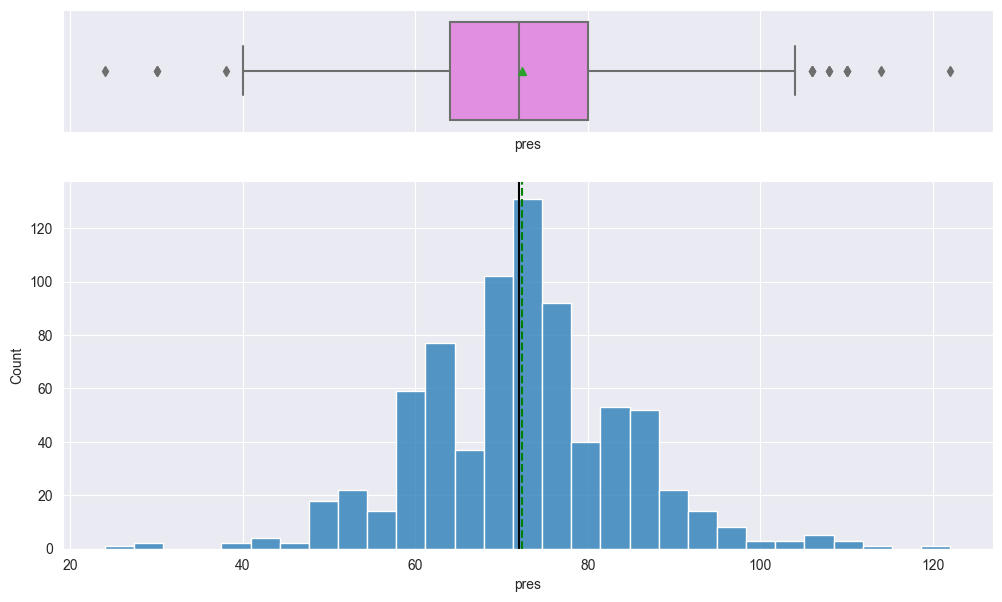

In [72]:
histogram_boxplot(data= df, feature= 'pres')

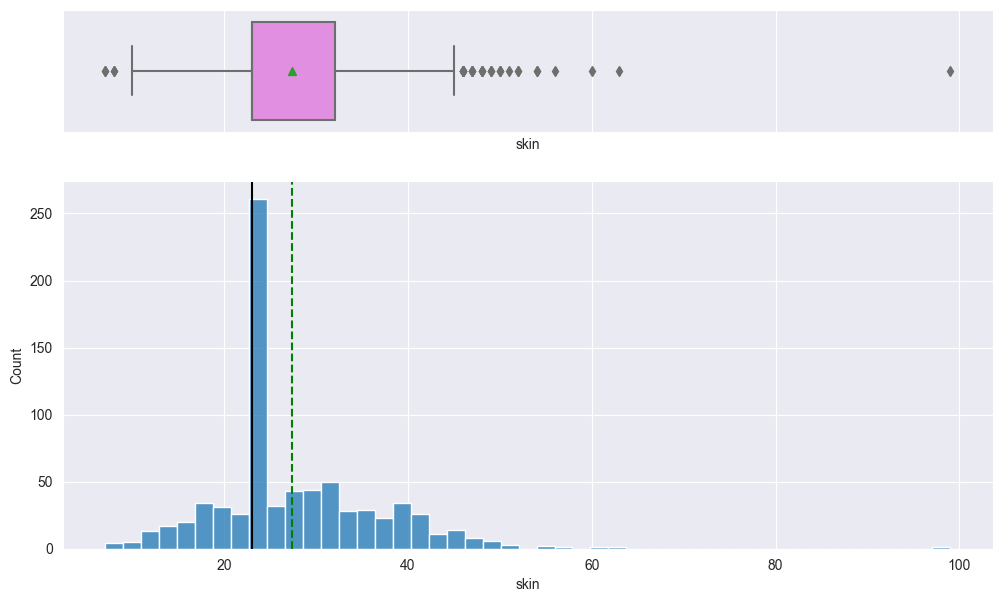

In [73]:
histogram_boxplot(data= df, feature= 'skin')

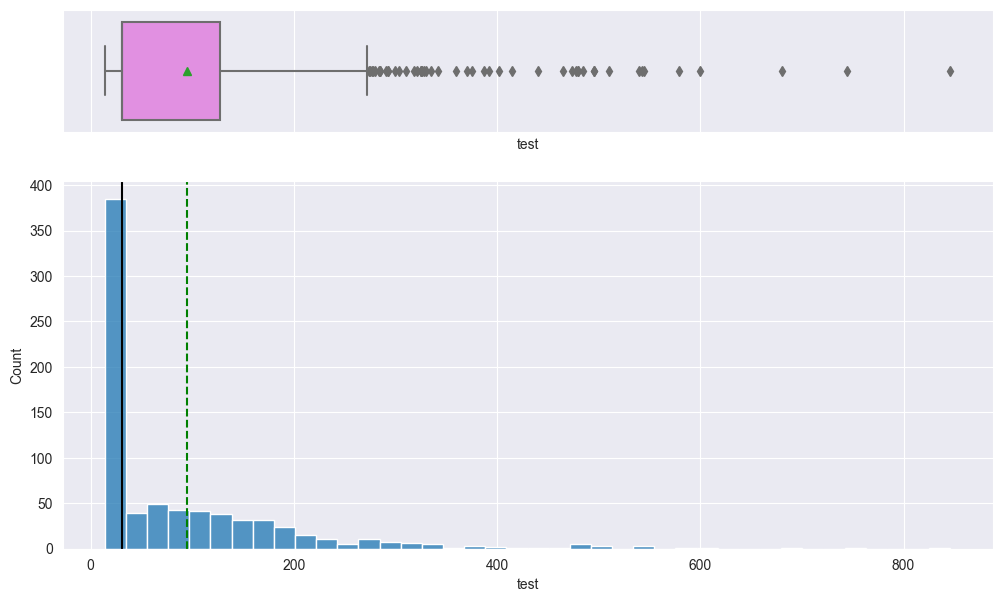

In [74]:
histogram_boxplot(data= df, feature= 'test')

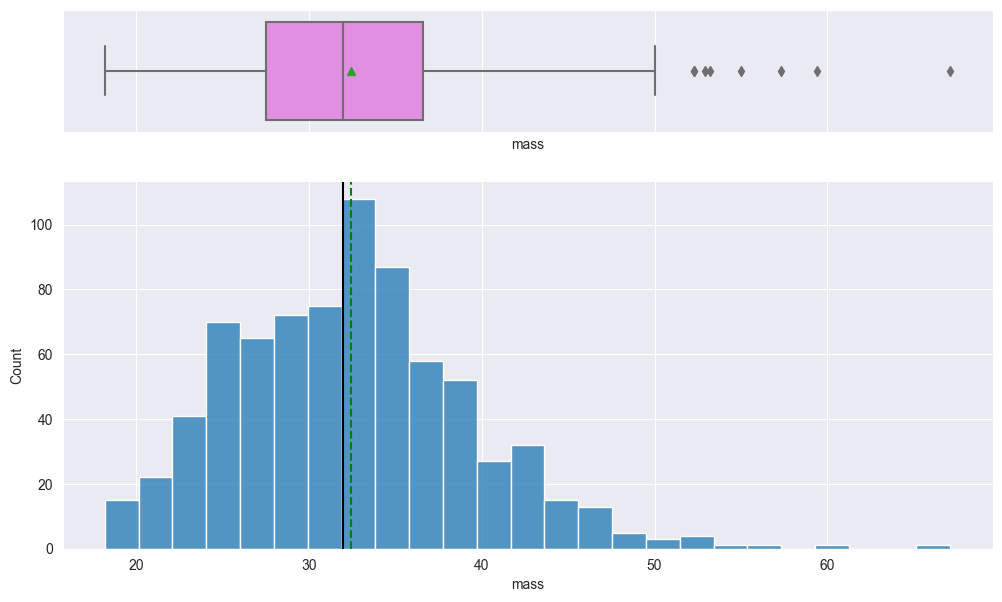

In [75]:
histogram_boxplot(data= df, feature= 'mass')

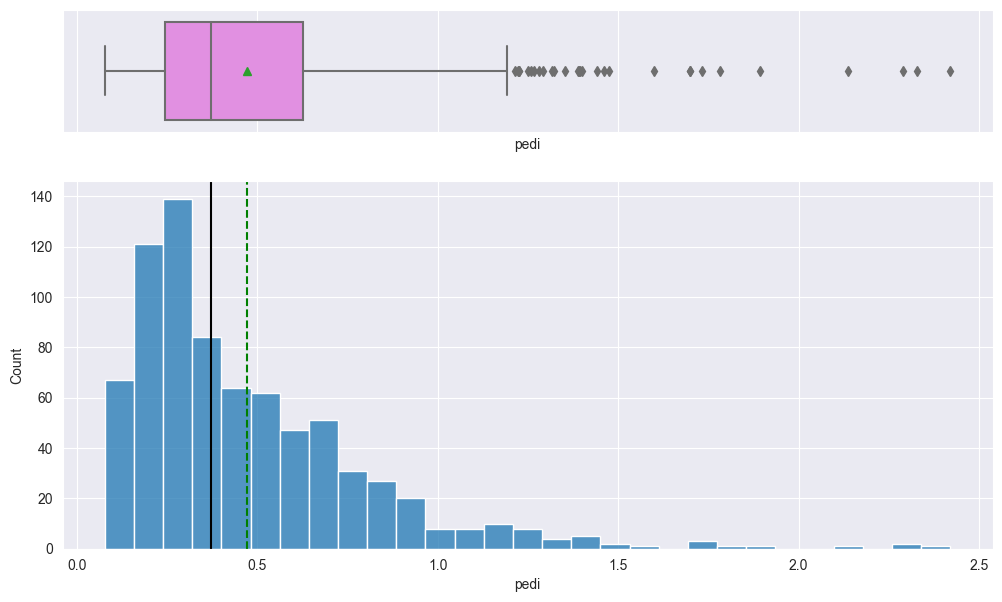

In [76]:
histogram_boxplot(data= df, feature= 'pedi')

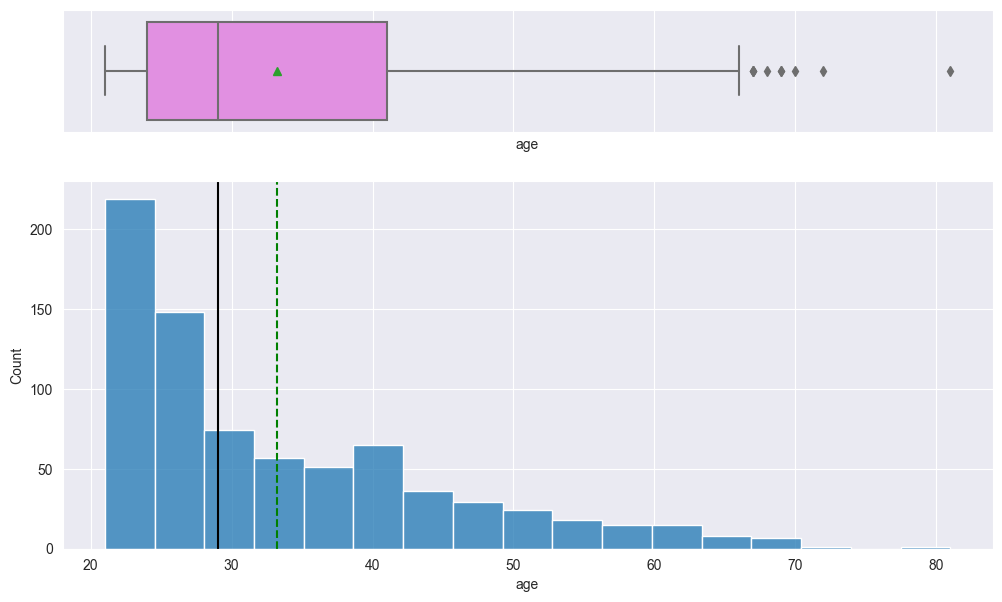

In [77]:
histogram_boxplot(data= df, feature= 'age')

* The distribution of the total charges is right-skewed
* The boxplot shows that there are outliers at the right end
* There are no outliers in the data
* Total charges are 2282.94 on average.

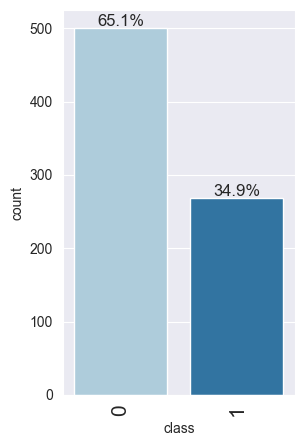

In [80]:
labeled_barplot(data= df, feature= 'class', perc= True)


### Bivariate Analysis 

#### Plotting the heatmap.

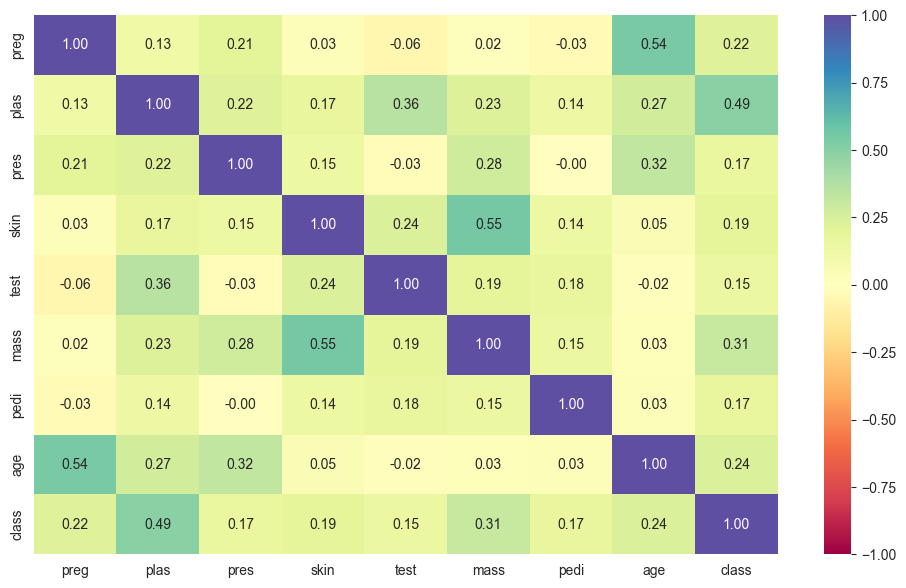

In [81]:
corr = df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is a high positive correlation (0.83) between Tenure and Total Charges Charges.
* Total Charges and Monthly Charges are also positively correlated (0.65)

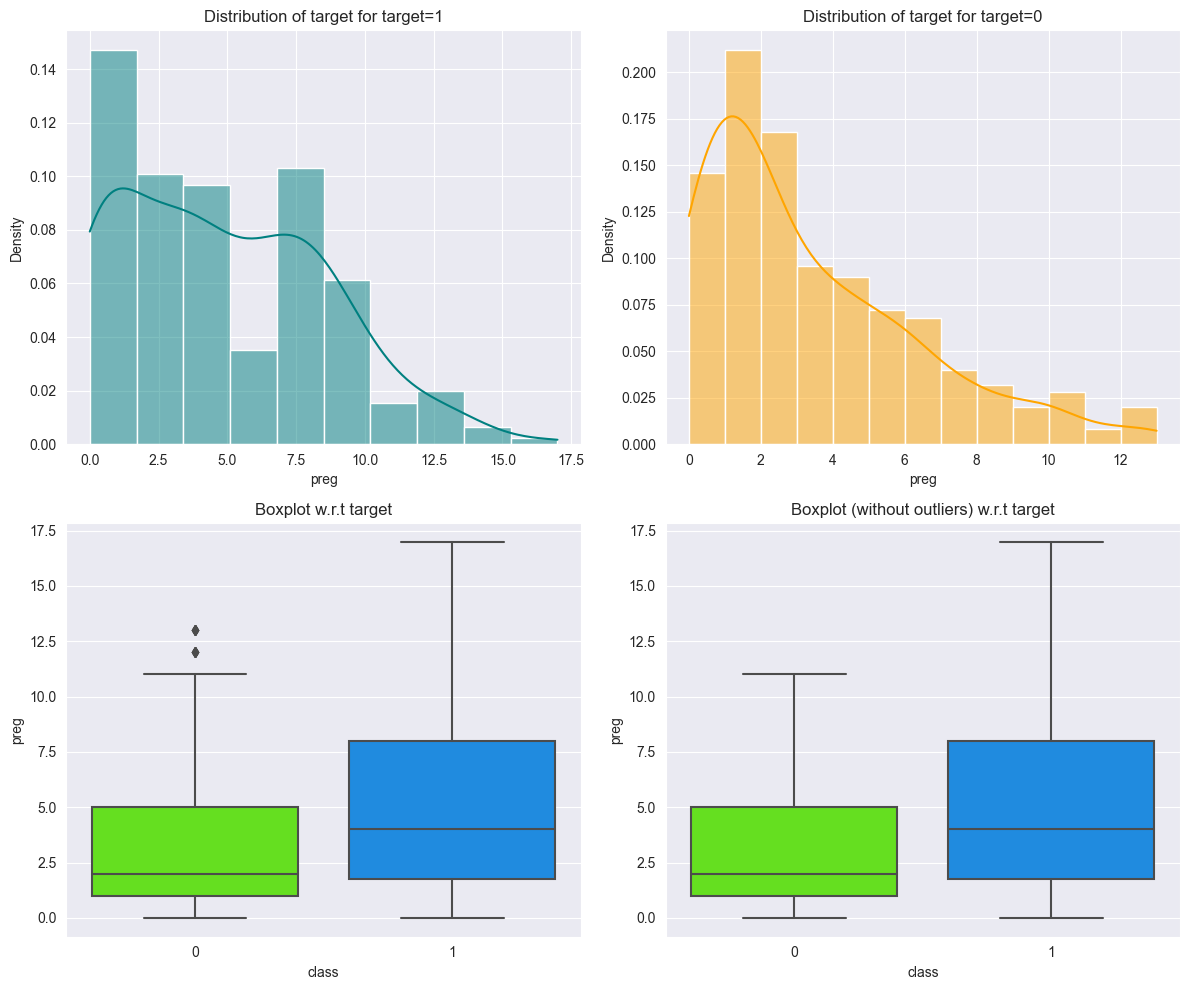

In [83]:
distribution_plot_wrt_target(data= df, predictor= 'preg', target= 'class')

- We can see that the median of tenure of the customers who did not churn is much more than the customers who did churn.
- There are outliers in boxplots of customers who did churn.
- It is clearly visible that customers who have churned have a very low tenure.

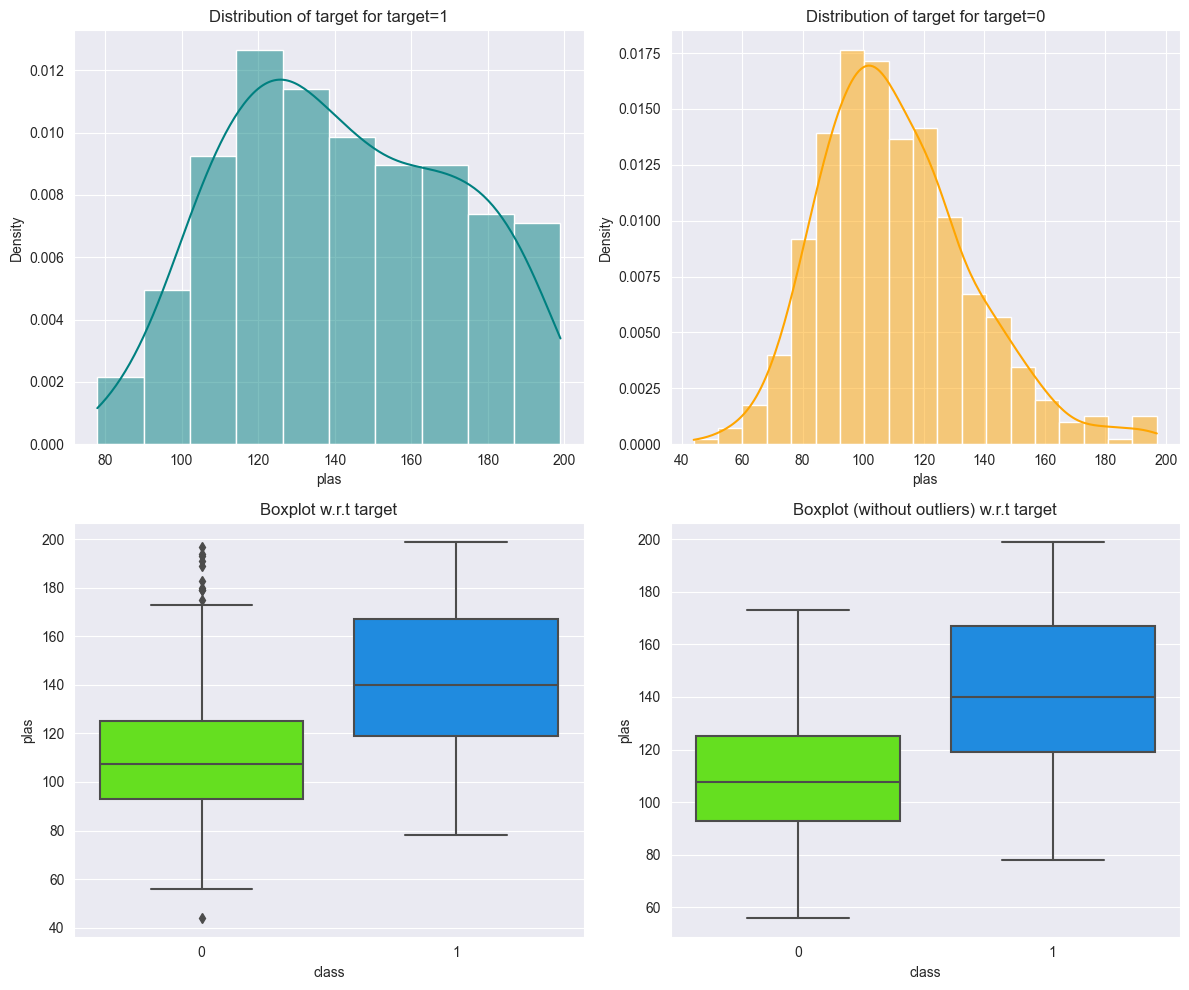

In [85]:
distribution_plot_wrt_target(data= df, predictor= 'plas', target= 'class')

- We can see that the second and third quartiles of monthly charges for customers who did churn is much more than the second and third quartiles duration of customers who did not churn.
- Customers who have churned, have high monthly charges as compared to those who have not churned

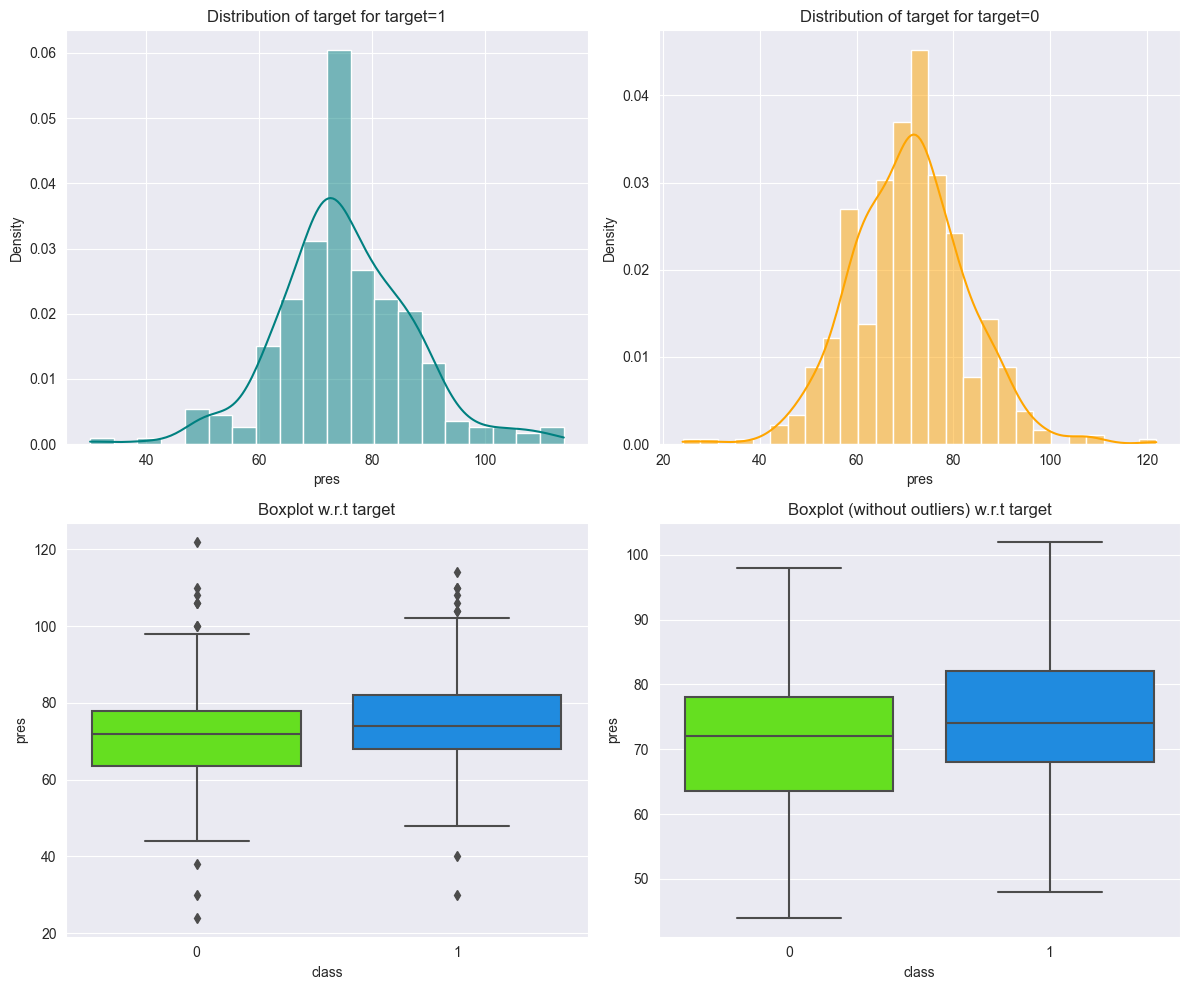

In [86]:
distribution_plot_wrt_target(data= df, predictor= 'pres', target= 'class')

- We can see that the median of total charges for customers who did churn is less than the once who didnot churn.
- There are outliers in distribution of total charges of customer who did churn.
- Customers who have churned, have lower total charges. 

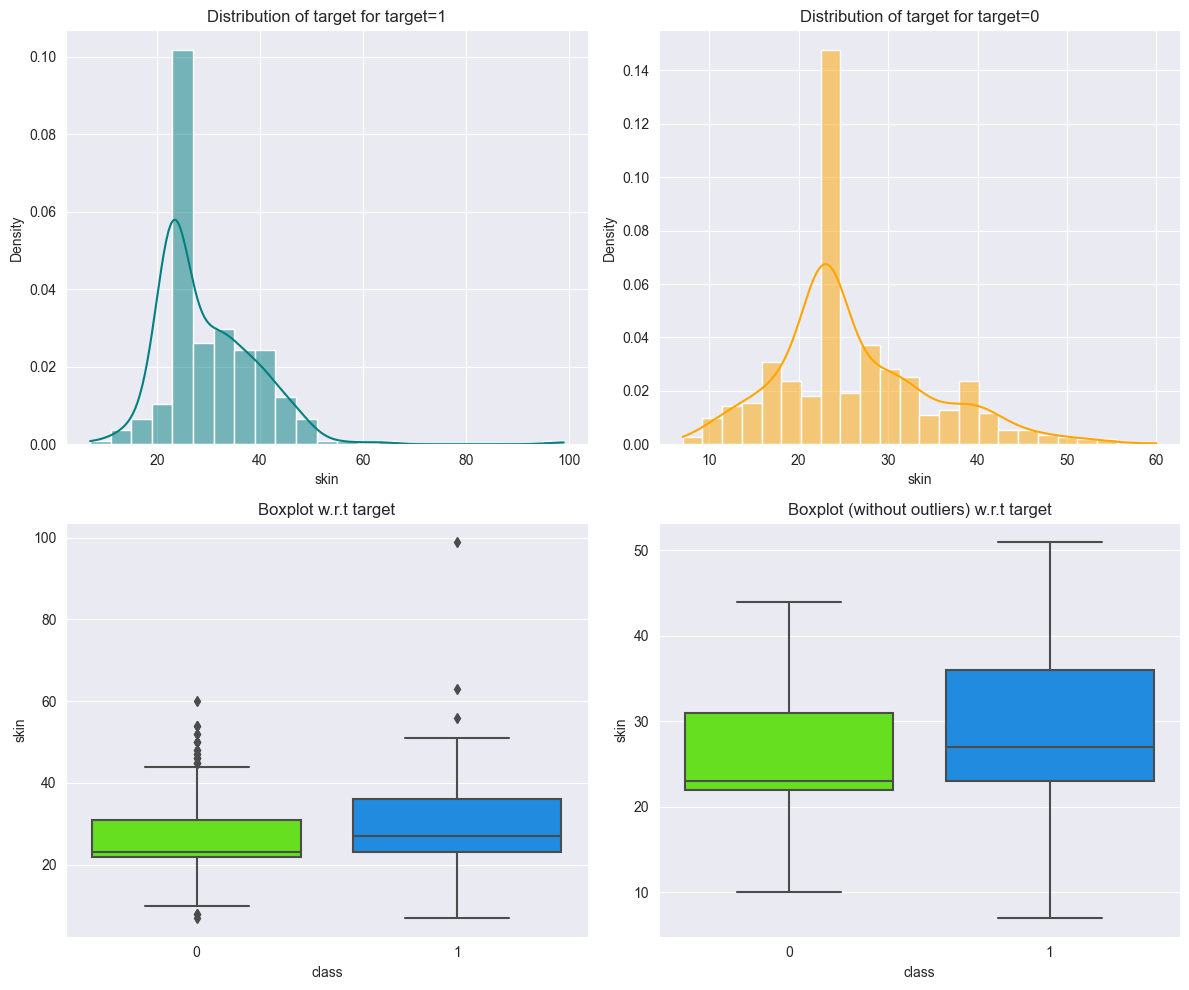

In [88]:
distribution_plot_wrt_target(data= df, predictor= 'skin', target= 'class')

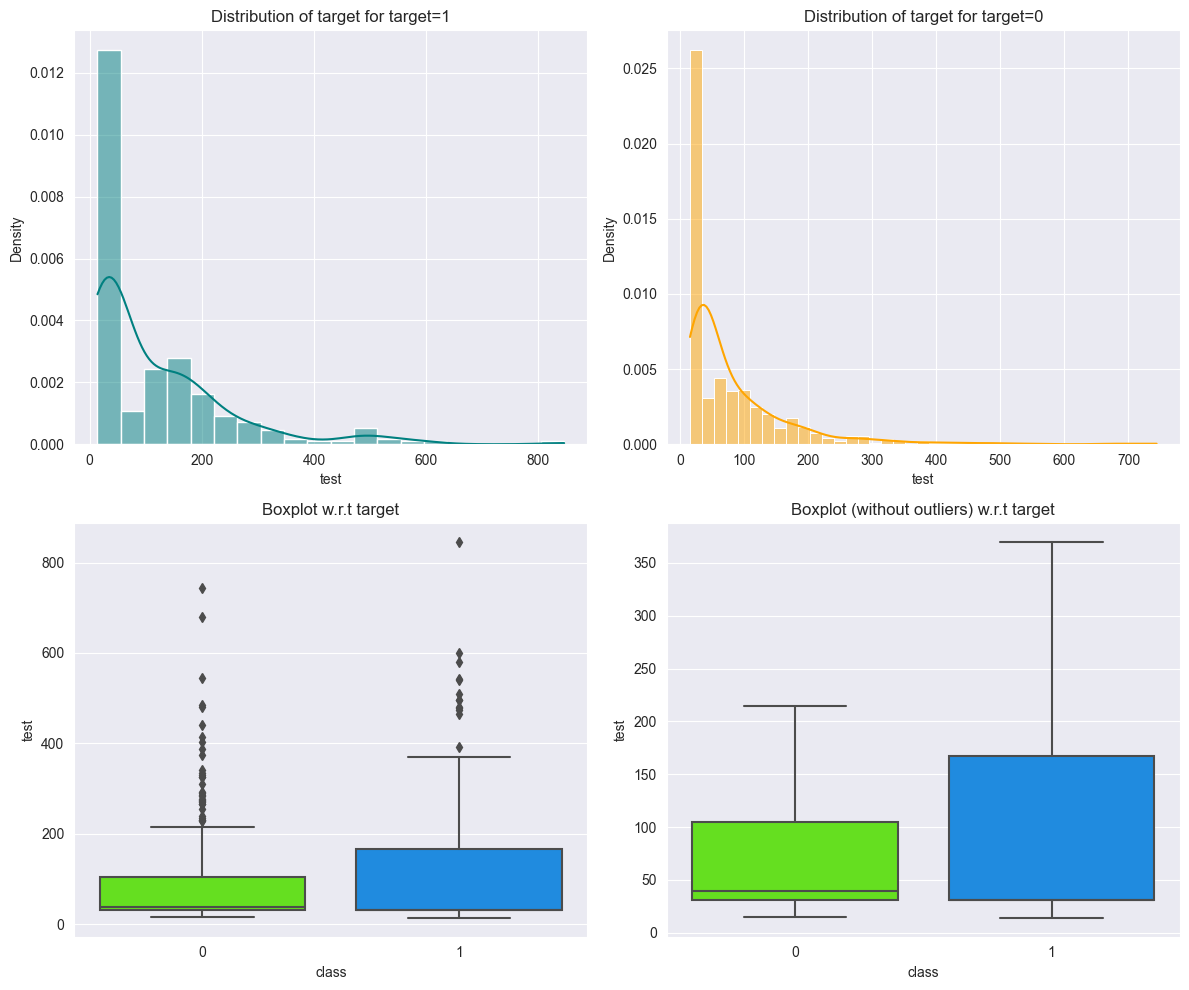

In [89]:
distribution_plot_wrt_target(data= df, predictor= 'test', target= 'class')

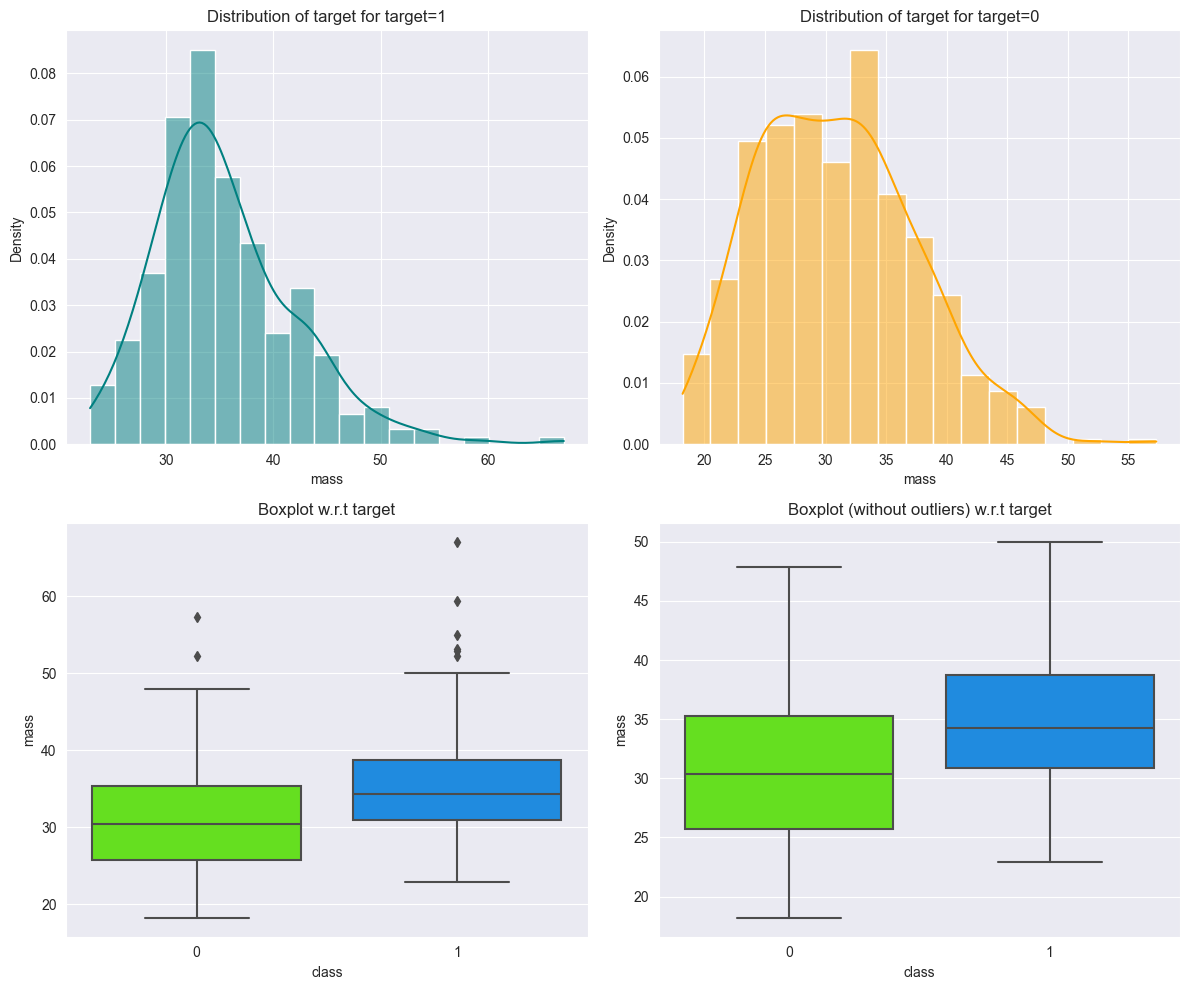

In [90]:
distribution_plot_wrt_target(data= df, predictor= 'mass', target= 'class')

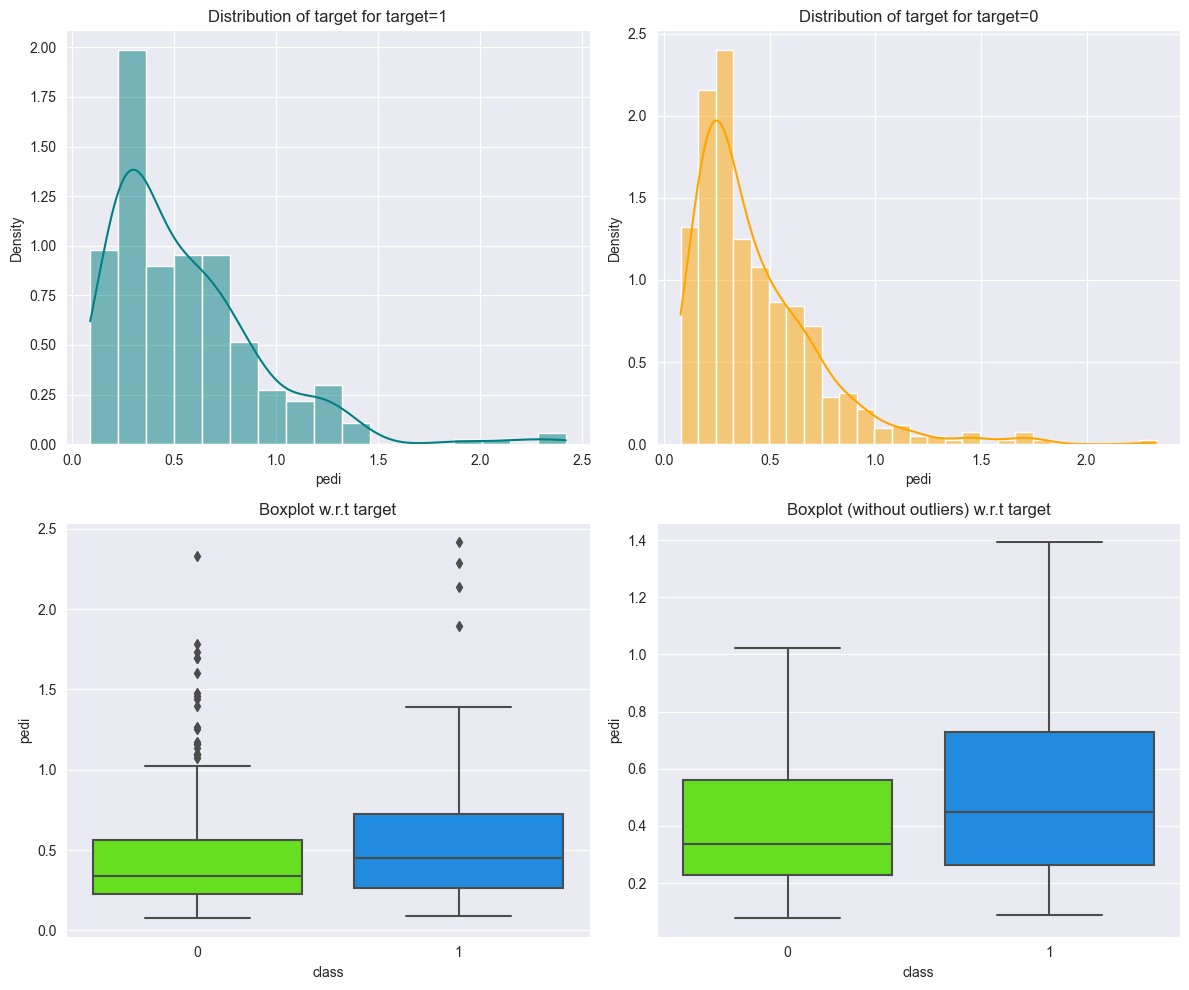

In [91]:
distribution_plot_wrt_target(data= df, predictor= 'pedi', target= 'class')

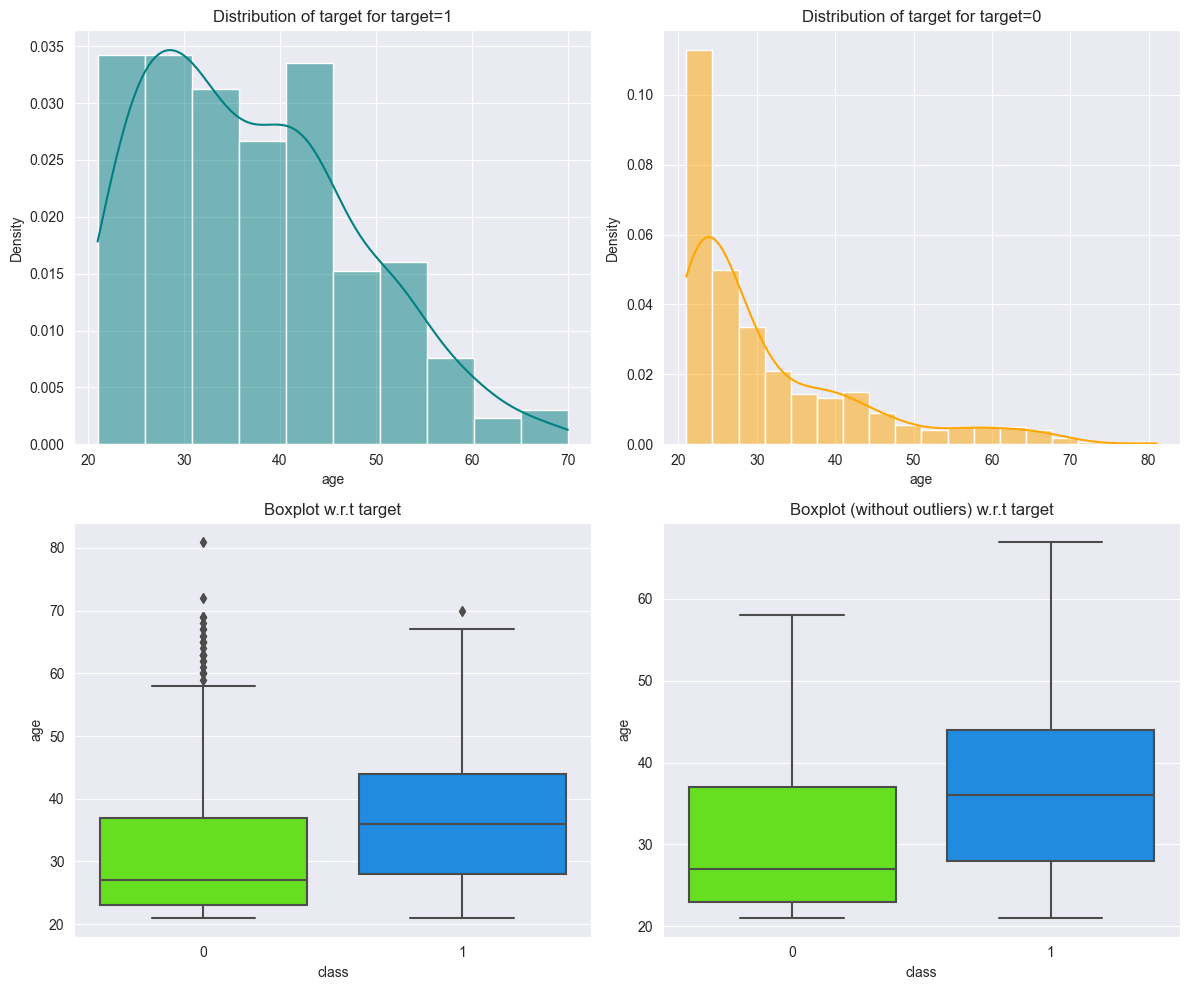

In [92]:
distribution_plot_wrt_target(data= df, predictor= 'age', target= 'class')

## Business questions  

##### Checking for outliers in the numerical columns 

In [93]:

# Outliers removal
def outliers(df, col, method = 'quantile', strategy = 'median', drop = True):
    if method == 'quantile':
        Q3, Q2, Q1 = df[col].quantile([0.75, 0.50, 0.25])
        IQR = Q3 - Q1
        upper_lim = Q3 + (1.5 * IQR)
        lower_lim = Q1 - (1.5 * IQR)
        print(f'Outliers for {col} are: {sorted([x for x in df[col] if x < lower_lim or x > upper_lim])}\n')
        if strategy == 'median':
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = Q2
        else:
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = df[col].mean()
    elif method == 'stddev':
        col_mean, col_std, Q2 = df[col].mean(), df[col].std(), df[col].median()
        cut_off = col_std * 3
        lower_lim, upper_lim = col_mean - cut_off, col_mean + cut_off
        print(f'Outliers for {col} are: {sorted([x for x in df[col] if x < lower_lim or x > upper_lim])}\n')
        if strategy == 'median':
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = Q2
        else:
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = col_mean
    else:
      print('Please pass the correct method, strategy or drop criteria')

     

In [94]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [95]:
# Replacing outliers with mean values in these columns
print('Replacing outliers with mean values using quantile method'); print('*'*60)

df_imp = df.copy(deep = True)
outlier_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

for col in outlier_cols:
    outliers(df_imp, col, method = 'quantile', strategy = 'mean')

print('\nColumn for which outliers were replaced with mean using quantile method: \n', outlier_cols)


Replacing outliers with mean values using quantile method
************************************************************
Outliers for preg are: [14, 14, 15, 17]

Outliers for plas are: []

Outliers for pres are: [24, 30, 30, 38, 106, 106, 106, 108, 108, 110, 110, 110, 114, 122]

Outliers for skin are: [7, 7, 8, 8, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 52, 52, 54, 54, 56, 60, 63, 99]

Outliers for test are: [274.0, 275.0, 277.0, 278.0, 280.0, 284.0, 285.0, 285.0, 291.0, 293.0, 293.0, 300.0, 304.0, 310.0, 318.0, 321.0, 325.0, 325.0, 325.0, 326.0, 328.0, 330.0, 335.0, 342.0, 360.0, 370.0, 375.0, 387.0, 392.0, 402.0, 415.0, 440.0, 465.0, 474.0, 478.0, 480.0, 480.0, 485.0, 495.0, 495.0, 510.0, 540.0, 543.0, 545.0, 579.0, 600.0, 680.0, 744.0, 846.0]

Outliers for mass are: [52.3, 52.3, 52.9, 53.2, 55.0, 57.3, 59.4, 67.1]

Outliers for pedi are: [1.213, 1.222, 1.224, 1.224, 1.251, 1.258, 1.268, 1.282, 1.292, 1.318, 1.321, 1.353, 1.39, 1.391,

In [96]:
print('Summary stats before outlier removal for columns with outliers'); print('*'*65); display(df[outlier_cols].describe().T)
print('\nSummary stats after outlier removal for columns with outliers'); print('*'*65); display(df_imp[outlier_cols].describe().T)

Summary stats before outlier removal for columns with outliers
*****************************************************************


,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00



Summary stats after outlier removal for columns with outliers
*****************************************************************


,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.786953,3.270156,0.000,1.00000,3.0000,6.00000,13.000
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.000
pres,768.0,72.115122,10.874232,40.000,64.00000,72.0000,80.00000,104.000
skin,768.0,26.476188,7.461435,10.000,23.00000,23.0000,31.00000,45.000
test,768.0,74.800735,58.990536,14.000,30.50000,31.2500,105.00000,272.000
mass,768.0,32.203655,6.410576,18.200,27.50000,32.0000,36.30000,50.000
pedi,768.0,0.431420,0.245050,0.078,0.24375,0.3725,0.58225,1.191
age,768.0,32.810115,11.047889,21.000,24.00000,29.0000,40.00000,66.000


* From the distribution shown above, it can be seen that there no outliers in the data. The numbers are gradually increasing.

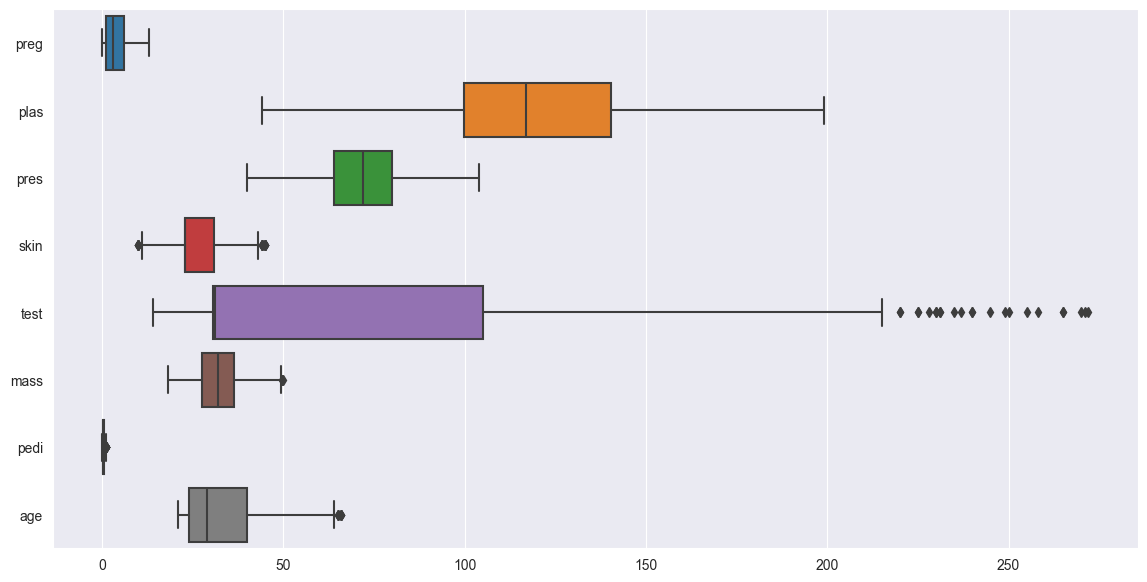

In [97]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (14, 7))
ax = sns.boxplot(data = df_imp.iloc[:, 0:-1], orient = 'h')

**Data Description:**

* The target variable is 'Churn'. It has a value of 1 for churn and 0 for not churn.
* There are a lot of binary variables with 'Yes/No' values.
* There are three continuous variables: tenure, monthly charges, and total charges.
* The shape of the data is (6499,21)

**Data Cleaning:**

* The column 'Total_Charges' had 9 missing values. I have imputed the values with median of Total Charges
* In the continuous variables, there are no outliers.

**Key Observations from EDA:**

* `Tenure`: The average tenure of customers with the company is around 32 months.
* `Monthly_Charges`: Average monthly charges is 64.77 USD.
* `Total_Charges`: Average total charges is 2282.94 USD. The distribution is skewed slightly to the right.
* `Senior Citizen`: About 16% of customers are senior citizens.
* `Dependents`: More than 70% of customers don't have dependents.
* `Phone_Services`: More than 90% of customers have phone services enabled.
* `Internet_Service`: 44% of customers use Fibre Optic for internet service. 34% use DSL, while the rest don't have internet services at all. 
* `Contract`: There are 55% customers with month-to-month contracts. Other two types of contract are: One-year and Two-year
* `Payment_Method`: Electronic check is the most used payment method among the four methods of payment.
* `Churn`: The churn rate in the data is about 26%.
* `Churn vs Senior_Citizen`: Among Senior Citizen customers, the churn rate is about 41%. Senior Citizens are more likely to churn compare to others.
* `Churn vs Internet_Service`: Among customers who don't use Internet Service, the churn rate is very low(8%). While, the churn rate is highest for Fibre Optic users(42%).
* `Churn vs Contract`: As the length of contract increases, the likelihood of churning decreases. 43% of monthly contract customers are likely to churn, followed by 11% of one-year contracts, while two-year contract customers have the least churn rate of 3%
* `Churn vs Payment_Method`: Customers with Electronic Check payment have a higher churn rate than any other payment method.
* `Churn vs Tenure`: As tenure increases, the customers are less likely to churn. Customers with low tenure have churned the most.
* `Churn vs Charges`: Customers who have churned, have higher monthly charges but lower total charges.
* `Contract vs Internet_Service`: Among the month-to-month contract customers, the most used service for Internet is Fiber Optic. Among the one-year and two-year contract customers, DSL service is more used as compared to Fiber Optic.
* `Contract vs Payment_Method`: Among the month-to-month contract customers, Electronic check method of payment is used extensively. Among the one-year and two-year contract customers, Credit Card and Bank transfer methods of payment are more used as compared to other methods
* `Internet_Service vs Payment_Method`: Customers without internet service use the mailed check payment method the most. Customers with Fibre Optice internet service use the Electronic Check method the most.

* In many other columns, like Online_Security, Online_Backup, Tech_Support, Streaming_Movies, etc. there is a level named 'No internet service'. Moreover, the count for the 'No internet service' level is also the same in all columns. This means that customers with No internet service don't have access to many other services like online security, streaming movies, etc.

#### Save the dataframe as the analytical base table

In [98]:
### Export the dataset to be used for next milestone
df_imp.to_csv('Resources/Analytical_Base_Table.csv', index=None)

## Cool!!!